In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('./LP-IV-datasets/ECGDataset/ecg.csv',header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [64]:
x = df.drop([140], axis = 1).values
y = df[140].values

In [65]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.13015314, -0.81456844, -0.92422829, ...,  0.41209124,
         0.77172417,  0.63616554],
       [-0.72754575, -1.62378238, -1.29351275, ...,  0.76190873,
         0.87786548, -0.51593741],
       [-0.26432105, -0.65284576, -0.99660187, ...,  0.51840757,
         0.76022193,  0.2013596 ],
       ...,
       [-0.74671683, -0.4172529 , -0.27050469, ..., -1.20017695,
        -0.83057384, -0.77902953],
       [-0.24750005, -0.16584826, -0.25041586, ...,  1.0241232 ,
         0.89470289,  1.06875185],
       [-0.9452788 , -0.38686749, -0.01991038, ..., -0.86987066,
        -0.59541889,  0.01558609]])

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [67]:
encoder = models.Sequential([
    layers.Input(shape=(140,)),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
])

In [68]:
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(140, activation = 'linear'),
])

In [69]:
autoencoder = models.Sequential([
    encoder,
    decoder
])

In [70]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [71]:
autoencoder.fit(x_train,x_train,validation_data=(x_test,y_test),epochs = 300)

Epoch 1/300
125/125 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.0183 - val_loss: 1.2239 - val_accuracy: 0.0000e+00
Epoch 2/300
125/125 [==============================] - 0s 654us/step - loss: 0.3690 - accuracy: 0.0428 - val_loss: 1.3277 - val_accuracy: 0.0000e+00
Epoch 3/300
125/125 [==============================] - 0s 663us/step - loss: 0.2970 - accuracy: 0.0688 - val_loss: 1.4088 - val_accuracy: 0.0000e+00
Epoch 4/300
125/125 [==============================] - 0s 659us/step - loss: 0.2499 - accuracy: 0.0988 - val_loss: 1.4220 - val_accuracy: 0.0000e+00
Epoch 5/300
125/125 [==============================] - 0s 682us/step - loss: 0.2284 - accuracy: 0.1158 - val_loss: 1.4541 - val_accuracy: 0.0000e+00
Epoch 6/300
125/125 [==============================] - 0s 666us/step - loss: 0.2135 - accuracy: 0.1308 - val_loss: 1.4426 - val_accuracy: 0.0000e+00
Epoch 7/300
125/125 [==============================] - 0s 662us/step - loss: 0.2018 - accuracy: 0.1328 - val

Epoch 57/300
125/125 [==============================] - 0s 588us/step - loss: 0.1186 - accuracy: 0.2066 - val_loss: 1.5288 - val_accuracy: 0.0130
Epoch 58/300
125/125 [==============================] - 0s 572us/step - loss: 0.1180 - accuracy: 0.2059 - val_loss: 1.5289 - val_accuracy: 0.0120
Epoch 59/300
125/125 [==============================] - 0s 574us/step - loss: 0.1174 - accuracy: 0.2086 - val_loss: 1.5111 - val_accuracy: 0.0120
Epoch 60/300
125/125 [==============================] - 0s 574us/step - loss: 0.1174 - accuracy: 0.2039 - val_loss: 1.5362 - val_accuracy: 0.0130
Epoch 61/300
125/125 [==============================] - 0s 574us/step - loss: 0.1171 - accuracy: 0.2139 - val_loss: 1.5413 - val_accuracy: 0.0110
Epoch 62/300
125/125 [==============================] - 0s 575us/step - loss: 0.1167 - accuracy: 0.2064 - val_loss: 1.5281 - val_accuracy: 0.0110
Epoch 63/300
125/125 [==============================] - 0s 573us/step - loss: 0.1167 - accuracy: 0.2089 - val_loss: 1.5341 -

125/125 [==============================] - 0s 572us/step - loss: 0.1063 - accuracy: 0.2251 - val_loss: 1.5312 - val_accuracy: 0.0110
Epoch 114/300
125/125 [==============================] - 0s 574us/step - loss: 0.1070 - accuracy: 0.2174 - val_loss: 1.5526 - val_accuracy: 0.0090
Epoch 115/300
125/125 [==============================] - 0s 568us/step - loss: 0.1065 - accuracy: 0.2184 - val_loss: 1.5197 - val_accuracy: 0.0090
Epoch 116/300
125/125 [==============================] - 0s 574us/step - loss: 0.1066 - accuracy: 0.2179 - val_loss: 1.5235 - val_accuracy: 0.0120
Epoch 117/300
125/125 [==============================] - 0s 572us/step - loss: 0.1071 - accuracy: 0.2199 - val_loss: 1.5461 - val_accuracy: 0.0100
Epoch 118/300
125/125 [==============================] - 0s 574us/step - loss: 0.1060 - accuracy: 0.2214 - val_loss: 1.5606 - val_accuracy: 0.0150
Epoch 119/300
125/125 [==============================] - 0s 574us/step - loss: 0.1063 - accuracy: 0.2204 - val_loss: 1.5583 - val_ac

Epoch 169/300
125/125 [==============================] - 0s 580us/step - loss: 0.1029 - accuracy: 0.2289 - val_loss: 1.5410 - val_accuracy: 0.0120
Epoch 170/300
125/125 [==============================] - 0s 572us/step - loss: 0.1025 - accuracy: 0.2274 - val_loss: 1.5380 - val_accuracy: 0.0140
Epoch 171/300
125/125 [==============================] - 0s 574us/step - loss: 0.1028 - accuracy: 0.2226 - val_loss: 1.5462 - val_accuracy: 0.0170
Epoch 172/300
125/125 [==============================] - 0s 573us/step - loss: 0.1023 - accuracy: 0.2256 - val_loss: 1.5445 - val_accuracy: 0.0110
Epoch 173/300
125/125 [==============================] - 0s 573us/step - loss: 0.1022 - accuracy: 0.2254 - val_loss: 1.5521 - val_accuracy: 0.0150
Epoch 174/300
125/125 [==============================] - 0s 570us/step - loss: 0.1020 - accuracy: 0.2224 - val_loss: 1.5350 - val_accuracy: 0.0130
Epoch 175/300
125/125 [==============================] - 0s 577us/step - loss: 0.1022 - accuracy: 0.2219 - val_loss: 1

Epoch 225/300
125/125 [==============================] - 0s 570us/step - loss: 0.0994 - accuracy: 0.2291 - val_loss: 1.5567 - val_accuracy: 0.0140
Epoch 226/300
125/125 [==============================] - 0s 572us/step - loss: 0.0998 - accuracy: 0.2269 - val_loss: 1.5372 - val_accuracy: 0.0120
Epoch 227/300
125/125 [==============================] - 0s 570us/step - loss: 0.1001 - accuracy: 0.2271 - val_loss: 1.5441 - val_accuracy: 0.0150
Epoch 228/300
125/125 [==============================] - 0s 574us/step - loss: 0.1001 - accuracy: 0.2294 - val_loss: 1.5445 - val_accuracy: 0.0190
Epoch 229/300
125/125 [==============================] - 0s 573us/step - loss: 0.0997 - accuracy: 0.2294 - val_loss: 1.5561 - val_accuracy: 0.0090
Epoch 230/300
125/125 [==============================] - 0s 571us/step - loss: 0.1004 - accuracy: 0.2286 - val_loss: 1.5368 - val_accuracy: 0.0060
Epoch 231/300
125/125 [==============================] - 0s 570us/step - loss: 0.1003 - accuracy: 0.2284 - val_loss: 1

Epoch 281/300
125/125 [==============================] - 0s 573us/step - loss: 0.0981 - accuracy: 0.2329 - val_loss: 1.5603 - val_accuracy: 0.0150
Epoch 282/300
125/125 [==============================] - 0s 573us/step - loss: 0.0980 - accuracy: 0.2284 - val_loss: 1.5625 - val_accuracy: 0.0180
Epoch 283/300
125/125 [==============================] - 0s 577us/step - loss: 0.0981 - accuracy: 0.2319 - val_loss: 1.5314 - val_accuracy: 0.0150
Epoch 284/300
125/125 [==============================] - 0s 570us/step - loss: 0.0985 - accuracy: 0.2324 - val_loss: 1.5475 - val_accuracy: 0.0120
Epoch 285/300
125/125 [==============================] - 0s 575us/step - loss: 0.0976 - accuracy: 0.2349 - val_loss: 1.5290 - val_accuracy: 0.0130
Epoch 286/300
125/125 [==============================] - 0s 577us/step - loss: 0.0976 - accuracy: 0.2289 - val_loss: 1.5370 - val_accuracy: 0.0160
Epoch 287/300
125/125 [==============================] - 0s 574us/step - loss: 0.0987 - accuracy: 0.2356 - val_loss: 1

In [72]:
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 0s 396us/step


In [73]:
mse = np.mean(np.power(x_test - prediction, 2), axis = 1)
thre = np.percentile(mse, 95)
anomalies = mse > thre

In [74]:
total_anomalies = np.sum(anomalies)
total_anomalies

50

In [75]:
print(confusion_matrix(anomalies, anomalies))
print(classification_report(anomalies, anomalies))

[[950   0]
 [  0  50]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [76]:
import matplotlib.pyplot as plt


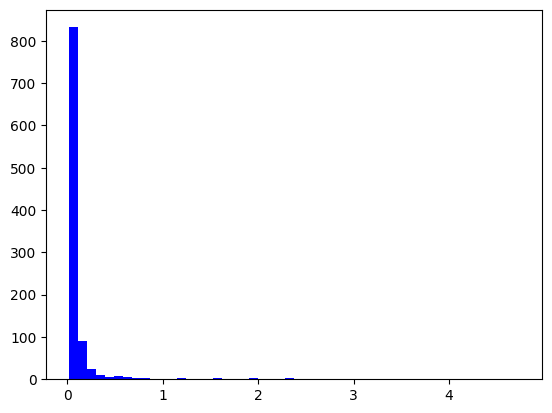

In [77]:
plt.hist(mse, bins = 50, color = 'blue')
plt.show()

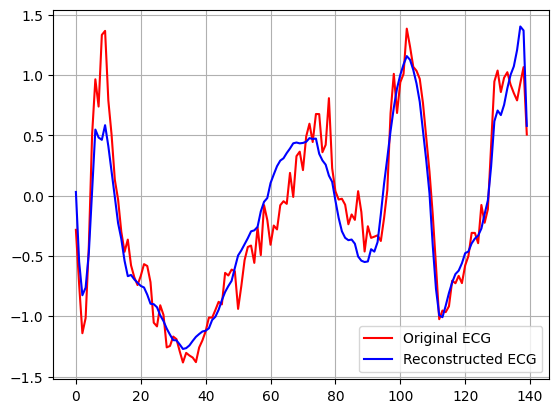

In [78]:
plt.plot(x_test[2], label='Original ECG', color = 'red')
plt.plot(prediction[2], label='Reconstructed ECG', color = 'blue')
plt.legend()
plt.grid()
plt.show()